#### Version of matplotlib

In [64]:
import matplotlib
import pandas as pd

import matplotlib.pyplot as plt

### US Oil and Gas Production June 2008 to June 2018

https://www.kaggle.com/djzurawski/us-oil-and-gas-production-june-2008-to-june-2018

* Month - Defines the date of crudeoil production (First day of the month)
* U.S. Crude Oil - Total amount of production each month for 10 years(2008-2018)
* Other columns are the cities which has the crude oil production

In [99]:
crude_oil_data = pd.read_csv('datasets/crude_oil_data_processed.csv')

crude_oil_data.head(5)

,U.S. Crude Oil,Alabama,Alaska,Arkansas,California,Colorado,Mexico,Pacific,Florida,Idaho,...,Pennsylvania,South Dakota,Wyoming,West Virginia,Utah,Texas,Tennessee,Date,Year,Month
0,5138,21,655,17,583,82,1326,67,5,0,...,8,5,144,6,60,1097,1,2008-06-01,2008,6
1,5177,21,640,17,586,81,1372,61,6,0,...,8,5,145,5,61,1111,1,2008-07-01,2008,7
2,5003,21,544,17,588,82,1272,70,5,0,...,8,5,145,6,62,1110,1,2008-08-01,2008,8
3,3974,21,681,16,587,88,242,67,5,0,...,8,5,144,6,63,1055,1,2008-09-01,2008,9
4,4738,21,716,17,586,86,803,66,6,0,...,8,5,145,6,64,1125,1,2008-10-01,2008,10


In [101]:
crude_oil_data['Date'] = pd.to_datetime(crude_oil_data['Date'])

crude_oil_data['Date'].head()

0   2008-06-01
1   2008-07-01
2   2008-08-01
3   2008-09-01
4   2008-10-01
Name: Date, dtype: datetime64[ns]

#### Line plot
* Plotting crude oil according to the date, From here we will be able to understand which day has the highest production, and which date has the lowest production
* Is there any reason for the highest and lowest production

Text(0.5, 1.0, 'U.S Crude Oil Production')

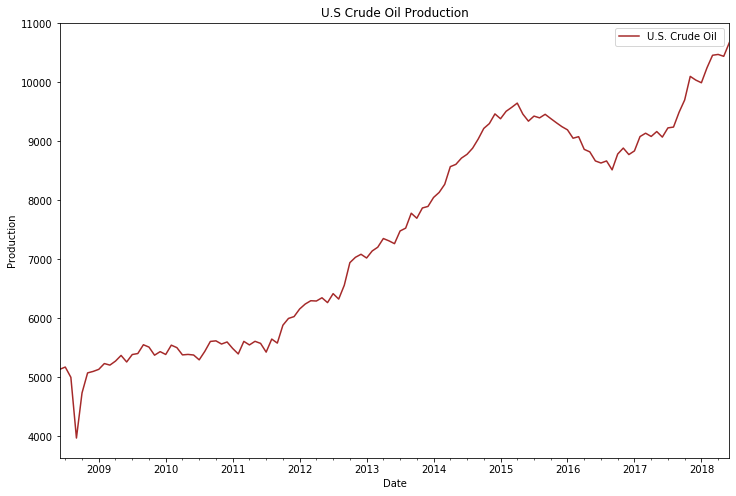

In [143]:
crude_oil_data.plot(x='Date', y='U.S. Crude Oil ', 
                    figsize=(12, 8), color='brown')

plt.ylabel('Production')
plt.title('U.S Crude Oil Production')

#### Boxplot
* Plotting total crude oil production and its variation, So from this data we are able to understand
    * Max - It is in the range 10000-11000
    * Min - It is 4000
    * Median(50%) - It is in the range 7000-7500
    * 25% - It is in the range 5500-6000
    * 75% - It is in the range 9000-9500

Text(0.5, 1.0, 'U.S Crude Oil Production')

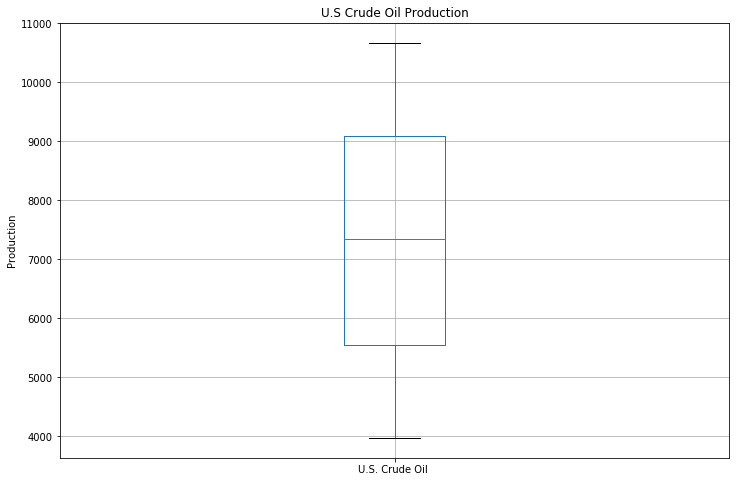

In [144]:
crude_oil_data.boxplot('U.S. Crude Oil ', figsize=(12, 8))

plt.ylabel('Production')
plt.title('U.S Crude Oil Production')

Text(0.5, 1.0, 'California Crude Oil Production')

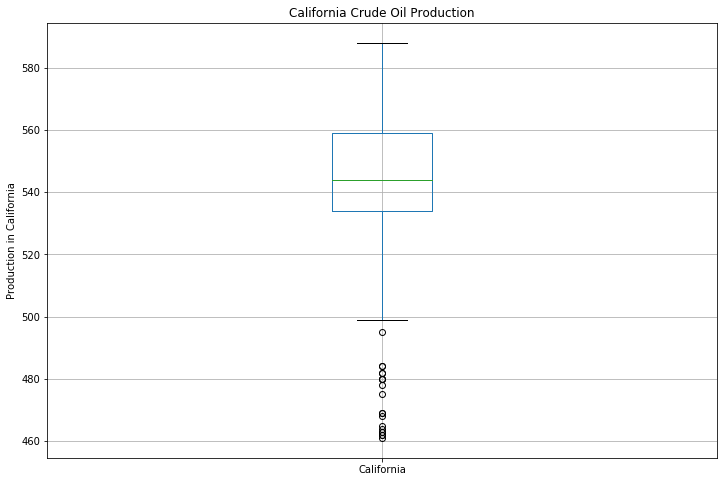

In [145]:
crude_oil_data[['California']].boxplot(figsize=(12, 8))

plt.ylabel('Production in California')
plt.title('California Crude Oil Production')

Text(0.5, 1.0, 'Alaska, California Crude Oil Production')

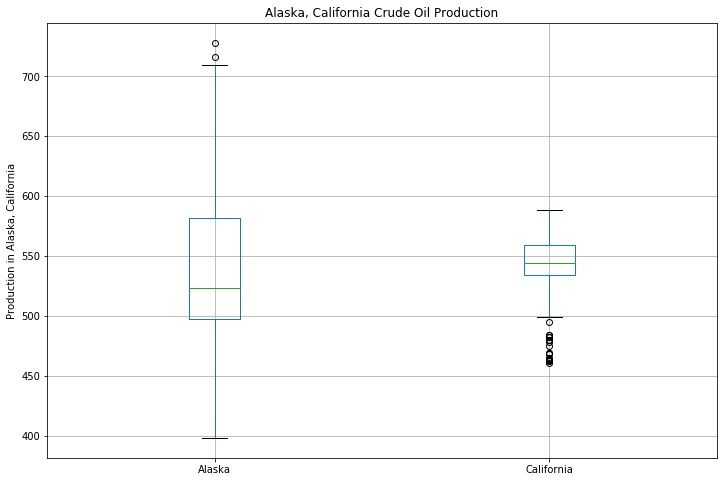

In [146]:
crude_oil_data[['Alaska', 'California']].boxplot(figsize=(12, 8))

plt.ylabel('Production in Alaska, California')
plt.title('Alaska, California Crude Oil Production')

* Extracting year from the date data, and making a new column. From here we will able to check it out every year production

Text(0, 0.5, 'Production')

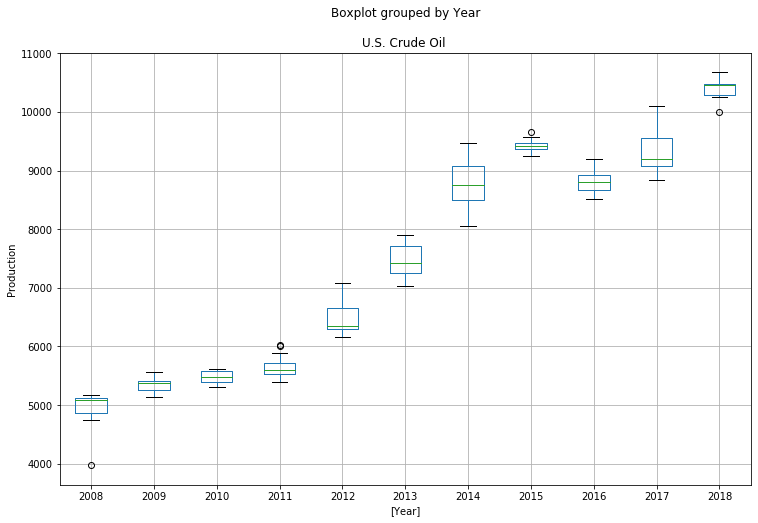

In [147]:
crude_oil_data.boxplot(column=['U.S. Crude Oil '], by=['Year'], 
                       figsize=(12, 8))

plt.ylabel('Production')

* Adding all the values of the `U.S. Crude Oil` column according to the year which we have added just now
* From the below data we will be able to understand for the year `2015` has highest production and the year 2008 has less production

In [148]:
year_data = crude_oil_data.groupby('Year', as_index=False).sum()

year_data[['Year', 'U.S. Crude Oil ']]

,Year,U.S. Crude Oil
0,2008,34211
1,2009,64180
2,2010,65741
3,2011,67829
4,2012,78007
5,2013,89585
6,2014,105064
7,2015,113179
8,2016,105970
9,2017,112205


Text(0.5, 1.0, 'U.S Crude Oil Production')

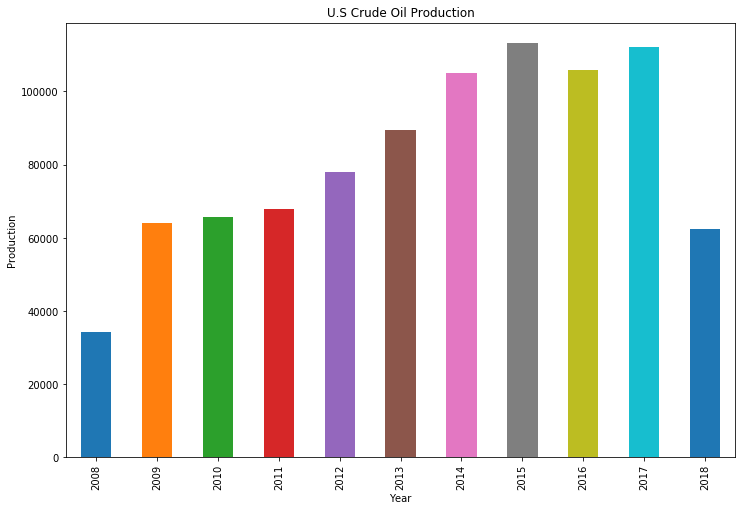

In [149]:
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']

year_data.plot.bar(x='Year', y='U.S. Crude Oil ', 
                   figsize=(12, 8), color=colors, 
                   legend=False)

plt.ylabel('Production')
plt.title('U.S Crude Oil Production')

In [154]:
mean_prod_data = crude_oil_data.mean().sort_values(ascending=False)

mean_prod_data

U.S. Crude Oil     7423.694215
Texas              2403.826446
Year               2012.958678
Mexico             1444.264463
North Dakota        746.380165
Alaska              540.404959
California          536.388430
Oklahoma            321.611570
New Mexico          305.495868
Colorado            212.115702
Wyoming             180.429752
Louisiana           177.404959
Kansas              114.520661
Utah                 85.148760
Montana              71.537190
Mississippi          62.355372
Pacific              43.115702
Ohio                 33.322314
Illinois             25.008264
Alabama              22.958678
Michigan             18.016529
West Virginia        16.471074
Arkansas             16.462810
Pennsylvania         13.876033
Kentucky              7.041322
Nebraska              6.966942
Month                 6.495868
Indiana               5.619835
Florida               5.190083
South Dakota          4.504132
Nevada                1.000000
New York              1.000000
Tennesse

In [155]:
mean_prod_data[1:]

Texas            2403.826446
Year             2012.958678
Mexico           1444.264463
North Dakota      746.380165
Alaska            540.404959
California        536.388430
Oklahoma          321.611570
New Mexico        305.495868
Colorado          212.115702
Wyoming           180.429752
Louisiana         177.404959
Kansas            114.520661
Utah               85.148760
Montana            71.537190
Mississippi        62.355372
Pacific            43.115702
Ohio               33.322314
Illinois           25.008264
Alabama            22.958678
Michigan           18.016529
West Virginia      16.471074
Arkansas           16.462810
Pennsylvania       13.876033
Kentucky            7.041322
Nebraska            6.966942
Month               6.495868
Indiana             5.619835
Florida             5.190083
South Dakota        4.504132
Nevada              1.000000
New York            1.000000
Tennessee           1.000000
Missouri            0.223140
Idaho               0.066116
dtype: float64

In [156]:
mean_prod_df = pd.DataFrame(mean_prod_data[1:]).reset_index()

mean_prod_df.columns = ['State', 'Production']

mean_prod_df.head(10)

,State,Production
0,Texas,2403.826446
1,Year,2012.958678
2,Mexico,1444.264463
3,North Dakota,746.380165
4,Alaska,540.404959
5,California,536.388430
6,Oklahoma,321.611570
7,New Mexico,305.495868
8,Colorado,212.115702
9,Wyoming,180.429752


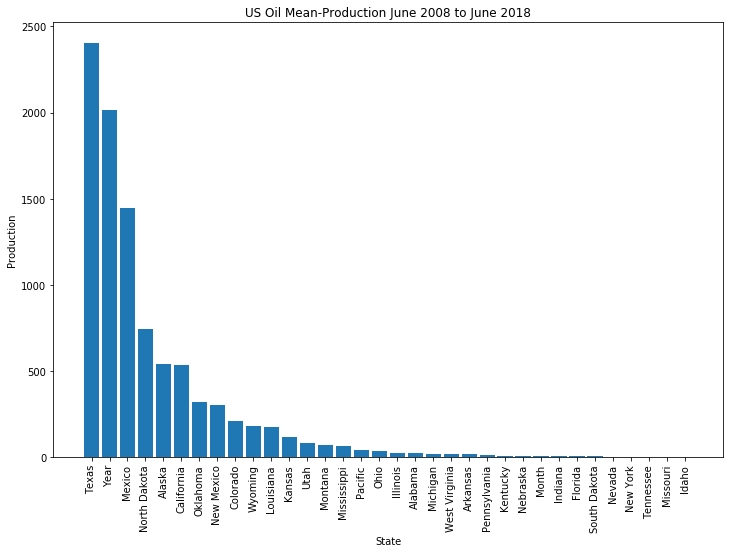

In [157]:
plt.figure(figsize=(12, 8))

plt.bar(mean_prod_df['State'], mean_prod_df['Production'], 
        width=0.85)

plt.title('US Oil Mean-Production June 2008 to June 2018')

plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Production')

plt.show()

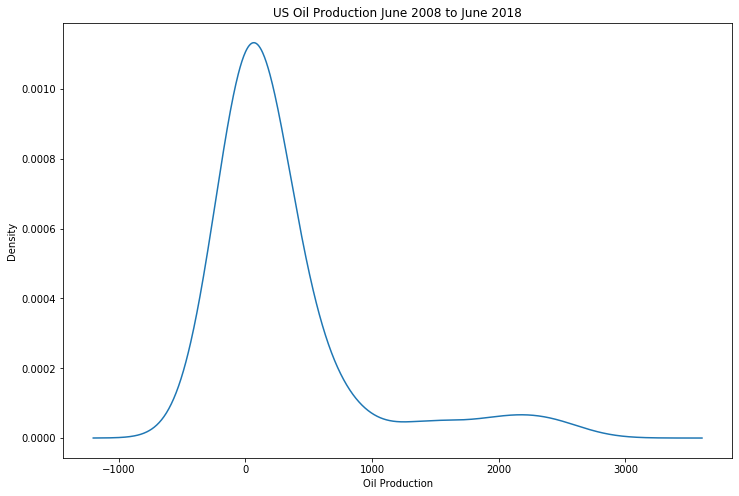

In [131]:
mean_prod_df['Production'].plot.kde(figsize=(12, 8))

plt.title('US Oil Production June 2008 to June 2018')
plt.xlabel('Oil Production')

plt.show()

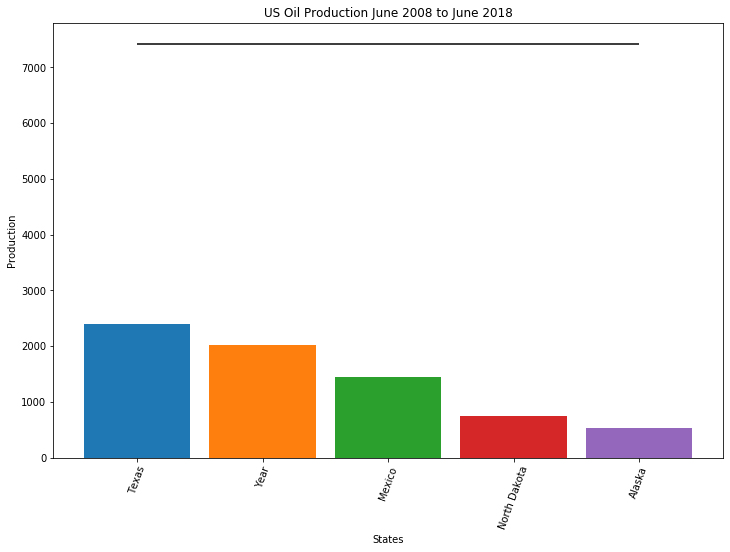

In [135]:
colors = ['C0', 'C1', 'C2', 'C3', 'C4']

plt.figure(figsize=(12, 8))

plt.xticks(rotation=70)

plt.bar(mean_prod_df[0:5]['State'], mean_prod_df[0:5]['Production'], 
        width=0.85, color=colors)

plt.hlines(mean_prod_data[0], 0, 4)

plt.title('US Oil Production June 2008 to June 2018')
plt.xlabel('States')
plt.ylabel('Production')

plt.show()

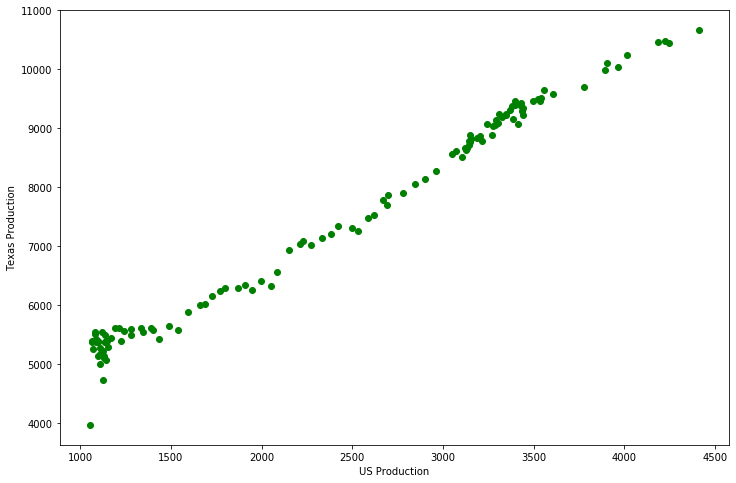

In [136]:
plt.figure(figsize=(12, 8))

plt.scatter(crude_oil_data['Texas'], crude_oil_data['U.S. Crude Oil '], c='g')

plt.xlabel('US Production')
plt.ylabel('Texas Production')

plt.show()

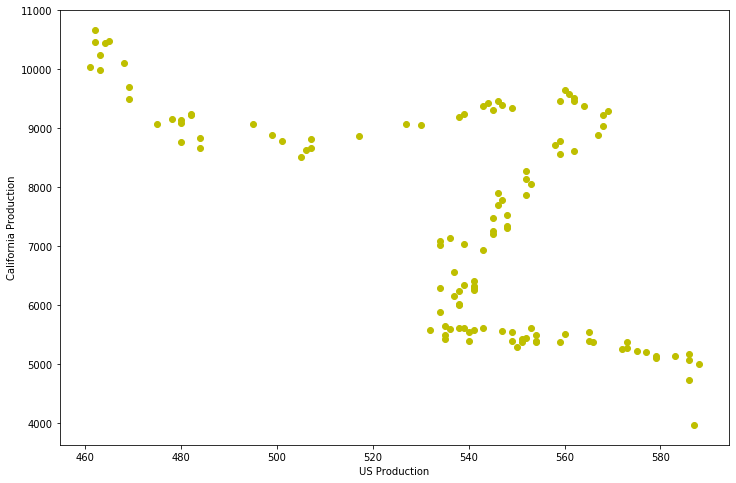

In [137]:
plt.figure(figsize=(12, 8))

plt.scatter(crude_oil_data['California'], crude_oil_data['U.S. Crude Oil '], c='y')

plt.xlabel('US Production')
plt.ylabel('California Production')

plt.show()

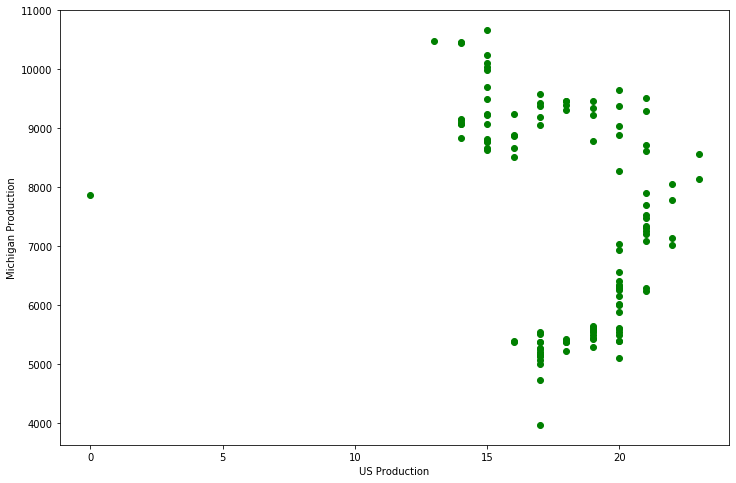

In [138]:
plt.figure(figsize=(12, 8))

plt.scatter(crude_oil_data['Michigan'], crude_oil_data['U.S. Crude Oil '], c='g')

plt.xlabel('US Production')
plt.ylabel('Michigan Production')

plt.show()

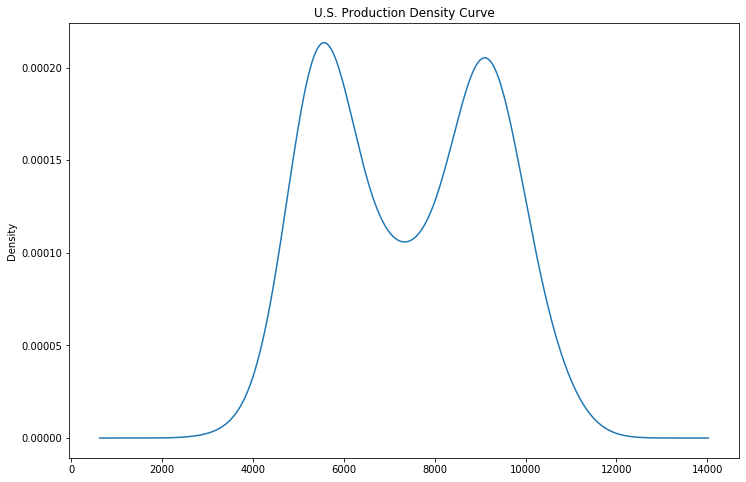

In [150]:
crude_oil_data['U.S. Crude Oil '].plot.kde(figsize=(12, 8))

plt.title('U.S. Production Density Curve')

plt.show()

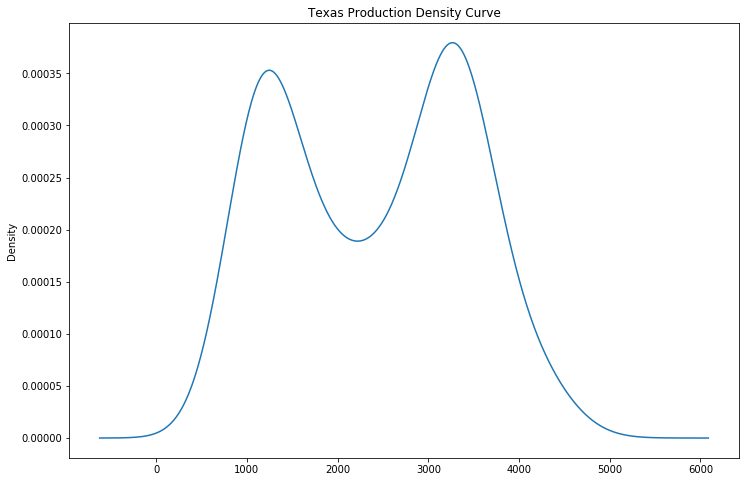

In [151]:
crude_oil_data['Texas'].plot.kde(figsize=(12, 8))

plt.title('Texas Production Density Curve')

plt.show()

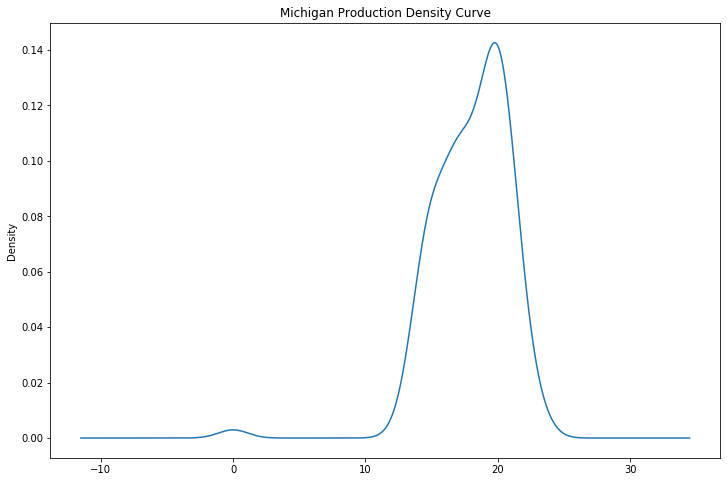

In [153]:
crude_oil_data['Michigan'].plot.kde(figsize=(12, 8))

plt.title('Michigan Production Density Curve')

plt.show()